In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(tidyr)
library(data.table)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [2]:
sim <- fread("test.csv", sep=";")
summary(sim)

ERROR: Error in fread("test.csv", sep = ";"): File 'test.csv' does not exist. Include one or more spaces to consider the input a system command.


# Feature Engineering

In [8]:
# features
sim$datetime <- sim$unix_timestamp %>% as.POSIXct(origin="1970-01-01")
sim$date <- as.Date(sim$datetime)
sim$hour <- hour(sim$datetime)

dim(sim)
sim$datetime[1:3]
summary(sim)

[1] 4320   12

[1] "2016-07-20 15:48:51 CEST" "2016-07-20 15:49:51 CEST"
[3] "2016-07-20 15:50:51 CEST"

 unix_timestamp          time            Edown_total          Eup_total        
 Min.   :1.469e+09   Length:4320        Min.   :1.839e+10   Min.   :7.772e+09  
 1st Qu.:1.469e+09   Class :character   1st Qu.:2.283e+10   1st Qu.:1.625e+10  
 Median :1.469e+09   Mode  :character   Median :2.442e+10   Median :2.350e+10  
 Mean   :1.469e+09                      Mean   :2.699e+10   Mean   :2.093e+10  
 3rd Qu.:1.469e+09                      3rd Qu.:3.148e+10   3rd Qu.:2.517e+10  
 Max.   :1.469e+09                      Max.   :3.953e+10   Max.   :2.963e+10  
  Pdown_total        Pnow_total        Pup_total        boilersactive   
 Min.   :      0   Min.   :      0   Min.   : 8799400   Min.   :   0.0  
 1st Qu.: 254175   1st Qu.: 520050   1st Qu.: 9481412   1st Qu.: 542.8  
 Median : 430650   Median : 772075   Median : 9884300   Median : 821.0  
 Mean   : 539576   Mean   : 756929   Mean   : 9848785   Mean   : 799.2  
 3rd Qu.: 795762   3rd Qu.: 939275   3rd Qu.:10193275   3rd Qu.: 994.0  
 M

# Results of Water/Power Usage Simulation

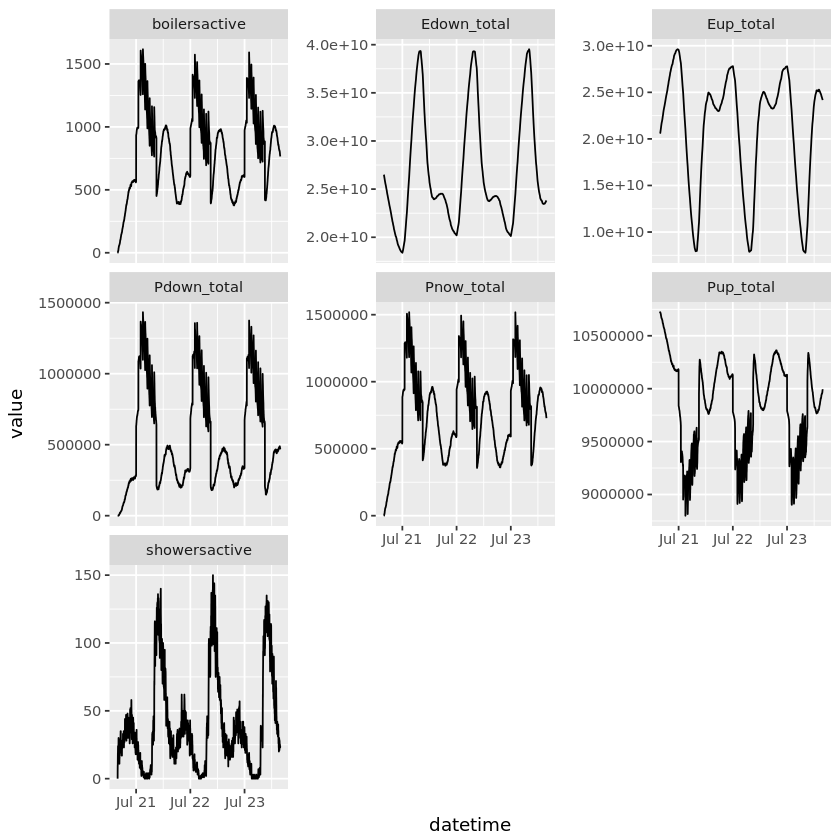

In [9]:
# plots
cols <-  c('Edown_total','Eup_total','Pdown_total','Pnow_total', 'Pup_total',
           'boilersactive','showersactive')

grp <- sim %>% gather(type, value, which(colnames(.) %in% cols))

ggplot(data = grp, aes(datetime, value)) + 
    geom_line() + 
    facet_wrap(~type, scales = "free_y")

Edown_total,Eup_total,Pdown_total,Pnow_total,Pup_total,boilersactive,showersactive
24711208066,22794400518,1356250,1493550,8939950,1574,12
24777350919,22725859100,1342150,1477450,8929100,1557,9
24843878613,22655850412,1321000,1457300,8910400,1537,11
24908329298,22588169004,1315850,1450150,8922000,1530,9
24971486775,22518835342,1312550,1446200,8930900,1525,7
25034489364,22448374825,1309750,1441400,8949100,1520,7
25099039016,22378173678,1307750,1438400,8965150,1517,7
25162966177,22308988859,1301950,1433600,8984900,1512,7
25228774701,22240274415,1293150,1426150,8973300,1504,7
25293657675,22171820378,1280900,1413900,8984350,1491,7


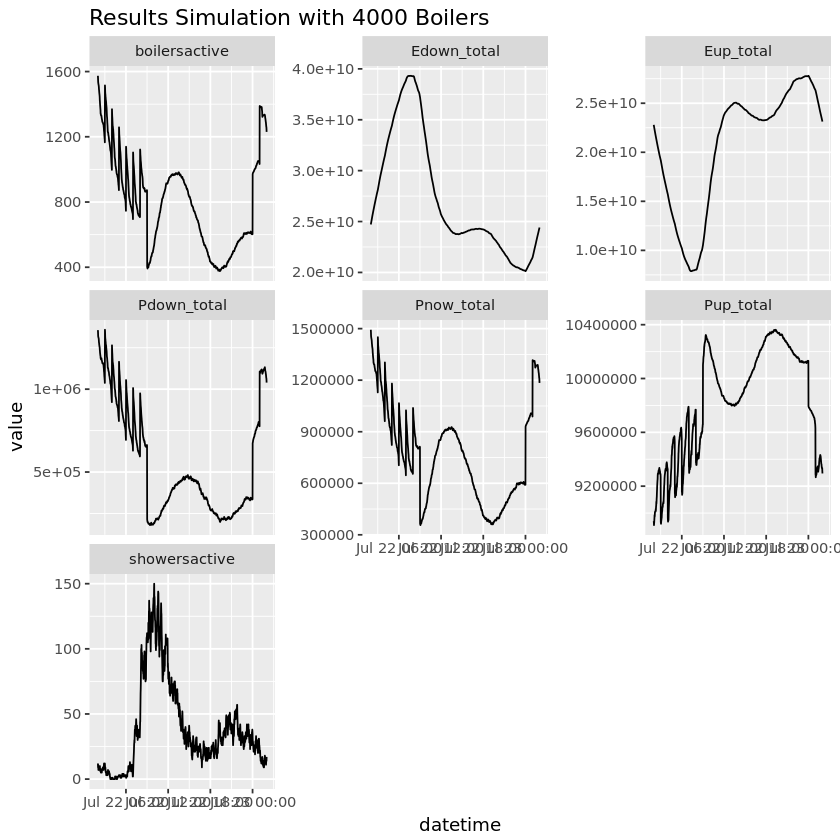

In [10]:
# plots
cols <-  c('Edown_total','Eup_total','Pdown_total','Pnow_total', 'Pup_total',
           'boilersactive','showersactive')

grp <- sim %>% 
    filter(date == '2016-07-22') %>%
    gather(type, value, which(colnames(.) %in% cols))

ggplot(data = grp, aes(datetime, value)) + 
    geom_line() + 
    facet_wrap(~type, scales = "free_y") +
    ggtitle('Results Simulation with 4000 Boilers')

(sim %>% filter(date == '2016-07-22') %>% select(cols))

In [11]:
summary(sim[sim$date == '2016-07-22', ])

 unix_timestamp          time            Edown_total          Eup_total        
 Min.   :1.469e+09   Length:1440        Min.   :2.012e+10   Min.   :7.879e+09  
 1st Qu.:1.469e+09   Class :character   1st Qu.:2.325e+10   1st Qu.:1.591e+10  
 Median :1.469e+09   Mode  :character   Median :2.427e+10   Median :2.352e+10  
 Mean   :1.469e+09                      Mean   :2.723e+10   Mean   :2.068e+10  
 3rd Qu.:1.469e+09                      3rd Qu.:3.173e+10   3rd Qu.:2.494e+10  
 Max.   :1.469e+09                      Max.   :3.932e+10   Max.   :2.780e+10  
  Pdown_total        Pnow_total        Pup_total        boilersactive   
 Min.   : 179700   Min.   : 356400   Min.   : 8910400   Min.   : 376.0  
 1st Qu.: 271725   1st Qu.: 535950   1st Qu.: 9539675   1st Qu.: 556.0  
 Median : 428750   Median : 758975   Median : 9886400   Median : 805.0  
 Mean   : 545288   Mean   : 762188   Mean   : 9844641   Mean   : 802.1  
 3rd Qu.: 785925   3rd Qu.: 918712   3rd Qu.:10181288   3rd Qu.: 974.0  
 M

In [12]:
sub <- sim %>% filter(date == '2016-07-22')

N_boilers <- 4000
paste('mean # boilers active: ', round(mean(sub$boilersactive), 2))
paste('mean hours ON per day: ', round(24 * mean(sub$boilersactive) / N_boilers, 2))
paste('mean p now [kW]: ', round(mean(sub$Pnow_total) / 1000, 2))
paste('mean p down [kW]: ', round(mean(sub$Pdown_total) / 1000, 2))
paste('min p down [kW]: ', round(min(sub$Pdown_total) / 1000, 2))

paste('mean p up [kW]: ', round(mean(sub$Pup_total) / 1000, 2))


[1] "mean # boilers active:  802.1"

[1] "mean hours ON per day:  4.81"

[1] "mean p now [kW]:  762.19"

[1] "mean p down [kW]:  545.29"

[1] "min p down [kW]:  179.7"

[1] "mean p up [kW]:  9844.64"

## Results for EDR-81

In [13]:
paste('yearly energy usage: ', round(365 * 24 * mean(sub$boilersactive) / N_boilers, 2), 'kWh')
paste('yearly energy costs consumer (22 ct/Kwh): ', round(0.22 * 365 * 24 * mean(sub$boilersactive) / N_boilers, 2), 'EUR')


[1] "yearly energy usage:  1756.59 kWh"

[1] "yearly energy costs consumer (22 ct/Kwh):  386.45 EUR"

# Load Data: Prices

In [14]:
prices <- fread('verrekenprijzen_clean.csv') %>% select(c(datetime, Afnemen, invoeden, opregelen, Afregelen))
summary(prices)

   datetime            Afnemen           invoeden         opregelen     
 Length:73152       Min.   :-435.10   Min.   :-435.10   Min.   :  0.00  
 Class :character   1st Qu.:  24.35   1st Qu.:  23.03   1st Qu.: 36.71  
 Mode  :character   Median :  34.29   Median :  32.22   Median : 44.26  
                    Mean   :  41.07   Mean   :  36.00   Mean   : 68.83  
                    3rd Qu.:  44.35   3rd Qu.:  41.66   3rd Qu.: 60.57  
                    Max.   : 737.99   Max.   : 737.99   Max.   :737.99  
                                                        NA's   :31384   
   Afregelen      
 Min.   :-435.10  
 1st Qu.:  18.03  
 Median :  25.50  
 Mean   :  12.79  
 3rd Qu.:  31.75  
 Max.   :  65.00  
 NA's   :28008    

In [15]:
apx <- fread('pricehub_clean.csv') %>% select(c(datetime, APXSPOT))
summary(apx)

   datetime            APXSPOT      
 Length:73152       Min.   :  0.12  
 Class :character   1st Qu.: 29.94  
 Mode  :character   Median : 37.00  
                    Mean   : 37.65  
                    3rd Qu.: 45.00  
                    Max.   :123.62  

In [16]:
igcc <- fread('igcc_clean.csv')  %>% select(c(datetime, count_afregelen))
summary(igcc)
fread('igcc_clean.csv') %>% colnames(.)

   datetime         count_afregelen 
 Length:70176       Min.   : 0.000  
 Class :character   1st Qu.: 0.000  
 Mode  :character   Median : 5.000  
                    Mean   : 6.751  
                    3rd Qu.:15.000  
                    Max.   :15.000  

[1] "datetime"                    "datetime_local"             
 [3] "mean_IGCC_op"                "max_IGCC_op"                
 [5] "mean_IGCC_af"                "max_IGCC_af"                
 [7] "mean_opregelen"              "mean_Afregelen"             
 [9] "mean_opregelen_reserve"      "mean_afregelen_reserve"     
[11] "mean_Mid_prijs_opregelen"    "max_Hoogste_prijs_opregelen"
[13] "min_Laagste_prijs_afregelen" "count_afregelen"

In [17]:
# merge imbalance and apx
prc <- full_join(apx, prices, by = 'datetime') %>%
    right_join(igcc, by = 'datetime')
dim(prc)
summary(prc)

[1] 70176     7

   datetime            APXSPOT          Afnemen           invoeden      
 Length:70176       Min.   :  0.12   Min.   :-435.10   Min.   :-435.10  
 Class :character   1st Qu.: 29.84   1st Qu.:  24.15   1st Qu.:  22.90  
 Mode  :character   Median : 36.95   Median :  34.16   Median :  32.06  
                    Mean   : 37.61   Mean   :  41.01   Mean   :  35.82  
                    3rd Qu.: 45.01   3rd Qu.:  44.23   3rd Qu.:  41.49  
                    Max.   :123.62   Max.   : 737.99   Max.   : 737.99  
                                                                        
   opregelen        Afregelen       count_afregelen 
 Min.   :  0.00   Min.   :-435.10   Min.   : 0.000  
 1st Qu.: 36.67   1st Qu.:  17.80   1st Qu.: 0.000  
 Median : 44.33   Median :  25.40   Median : 5.000  
 Mean   : 69.39   Mean   :  12.44   Mean   : 6.751  
 3rd Qu.: 61.25   3rd Qu.:  31.75   3rd Qu.:15.000  
 Max.   :737.99   Max.   :  65.00   Max.   :15.000  
 NA's   :30279    NA's   :26592              

In [18]:
#convert to datetime
datetime2ptu <-function(datetime){
  #create yyymmdd
  mydate<-format(datetime, format = '%Y-%m-%d')
  
  ones<-rep(1, length(mydate))
  
  PTU<- ave(ones, mydate,FUN = cumsum)
  return(PTU)
}

prc$datetime <- prc$datetime %>% strptime("%Y-%m-%d %H:%M:%S %z") %>% as.POSIXct()
prc$PTU<-datetime2ptu(prc$datetime)
prc$hour<-hour(prc$datetime)
prc$day<-floor_date(prc$datetime,"day")
prc$month<-floor_date(prc$datetime,"month")
prc$weekday<-factor(weekdays.Date(prc$datetime),levels=c('maandag','dinsdag','woensdag','donderdag','vrijdag','zaterdag','zondag'))
prc$quarter<-factor(paste('Q',ceiling(month(prc$datetime)/3),sep=''),levels=c("Q1","Q2","Q3","Q4"))
prc <- prc %>% mutate(spread_up = invoeden - APXSPOT, 
                     spread_down = Afnemen - APXSPOT,
                     spread_up_reg = opregelen - APXSPOT,
                     spread_down_reg = Afregelen - APXSPOT)
prc <- prc[prc$PTU <= 96, ]

summary(prc)

    datetime                      APXSPOT          Afnemen       
 Min.   :2014-06-01 00:00:00   Min.   :  0.12   Min.   :-435.10  
 1st Qu.:2014-11-30 17:26:15   1st Qu.: 29.84   1st Qu.:  24.15  
 Median :2015-06-01 11:52:30   Median : 36.95   Median :  34.16  
 Mean   :2015-06-01 11:58:19   Mean   : 37.61   Mean   :  41.01  
 3rd Qu.:2015-12-01 05:18:45   3rd Qu.: 45.01   3rd Qu.:  44.22  
 Max.   :2016-05-31 23:45:00   Max.   :123.62   Max.   : 737.99  
                                                                 
    invoeden         opregelen        Afregelen       count_afregelen 
 Min.   :-435.10   Min.   :  0.00   Min.   :-435.10   Min.   : 0.000  
 1st Qu.:  22.90   1st Qu.: 36.67   1st Qu.:  17.80   1st Qu.: 0.000  
 Median :  32.06   Median : 44.33   Median :  25.40   Median : 5.000  
 Mean   :  35.82   Mean   : 69.39   Mean   :  12.44   Mean   : 6.751  
 3rd Qu.:  41.49   3rd Qu.: 61.22   3rd Qu.:  31.75   3rd Qu.:15.000  
 Max.   : 737.99   Max.   :737.99   Max.   :  

In [19]:
ptu_boilers_on_nighttariff <- c(93:96, 1:15)

mean(prc$APXSPOT[prc$PTU %in% ptu_boilers_on_nighttariff]) %>% round(2)
mean(prc$APXSPOT) %>% round(2)


[1] 31.12

[1] 37.61

The boilers are on for 4.8 hours. The mean APX price is 37.66 EUR/MWh, while the mean APX price is 31.22 EUR/MWh during the PTU the boilers on with night tariff.

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


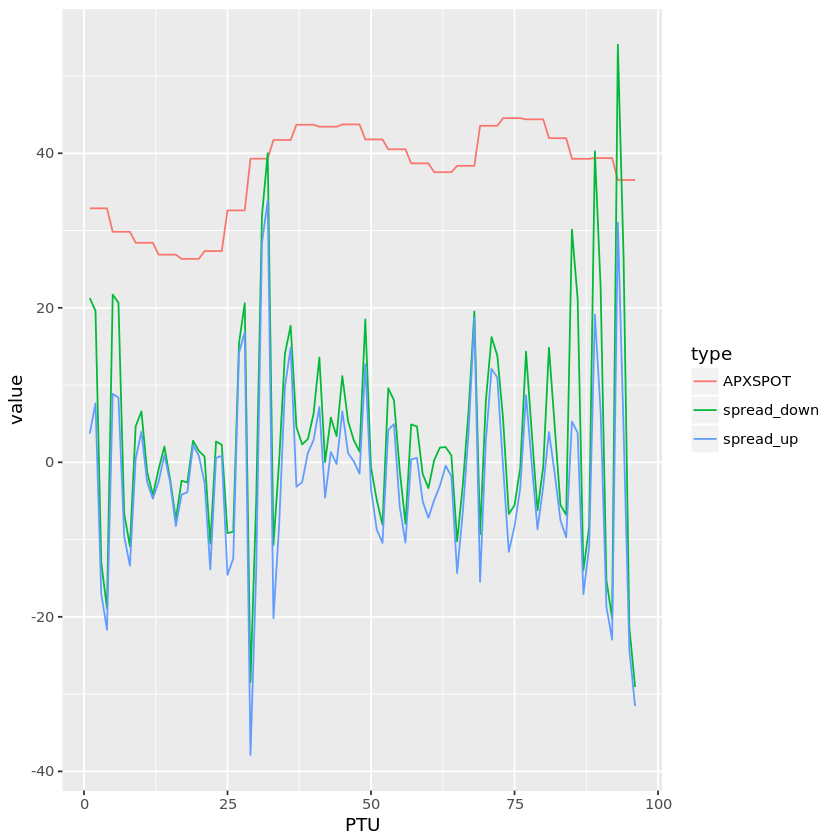

In [20]:
cols <-  c('APXSPOT', 'spread_up', 'spread_down')

grp <- prc[, c('PTU', cols)] %>%
    group_by(PTU) %>%
    summarize_each(funs(mean(.))) %>%
    gather(type, value, which(colnames(.) %in% cols))

ggplot(grp) +
    geom_line(aes(PTU, value, color = type))

# R1

How many boilers are needed for a 100 kW baseline? 

Het verdienmodel:
- Ondergrens: boilers 4.8 uur per dag aan, kan geen baseline draaien door groot verschil in vraag per dag. Factor tussen mean en min is ongeveer drie, zie simulatie resultaat (min is 180 kW, mean is 540 kW).



In [21]:
price_per_week <- 2000 #EUR/MW/week  AK: used to be 3000
capacity <- 4.6 #kW   AK: used to be 1kW
baseline_kw <- 100 #kW
hours_per_day <- 18 # AK: used to be 4.8
boilers_for_basline <- baseline_kw * 24 / (capacity * hours_per_day)

paste("BOVEN - number of boilers needed per day", boilers_for_basline)
paste("ONDER - number of boilers needed per day", boilers_for_basline * 3)

paste("BOVEN - earnings per boiler per year", 
      52 * price_per_week  * (baseline_kw / 1000)/ (boilers_for_basline), 
     'EUR')
paste("ONDER - earnings per boiler per year", 
      52 * price_per_week * (baseline_kw / 1000)/ (boilers_for_basline * 3),
     'EUR')

[1] "BOVEN - number of boilers needed per day 28.9855072463768"

[1] "ONDER - number of boilers needed per day 86.9565217391304"

[1] "BOVEN - earnings per boiler per year 358.8 EUR"

[1] "ONDER - earnings per boiler per year 119.6 EUR"

## Results - R1

- De inkomsten per boiler worden ingeschat tussen de 10 en 30 EUR/jaar.
- Er zijn tussen de 500 en 1500 boilers (vermogen 1 kW, e.g. EDR-81) nodig om een baseline van 100 kW te kunnen draaien. 
- Voornaamste bron van onzekerheid is aantal uren aan per dag per boiler en hoe stabiel er een baseline gedraaid kan worden.



# Passief Onbalans

- Onder en bovengrens schatting
    - ondergrens: simpele voorspelling: 16-20 PTU beste PTU per weekdag voor periode van 1 jaar, gebruiken als forecast voor jaar 2
    - bovengens: 16-20 meest positieve PTU per dag

## Bovengrens


In [22]:
# calc rank per of spread per day
prc <- prc %>% 
    arrange(day, spread_down) %>%
    group_by(day) %>%
    mutate(rank_down = row_number()) %>%
    arrange(datetime)
    

In [23]:
sub_down <- prc %>%
    filter(datetime >= "2015-06-01 00:00:00") %>%
    filter(rank_down <= 72) #AK: used to be 19

summary(sub_down$spread_down)
summary(sub_down$APXSPOT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-456.07  -15.12   -6.32  -15.06   -0.44  200.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.67   26.08   32.99   34.52   42.00  123.62 

Calculate the income for 1 boilers using 0.25 kWh in 1 PTU for the 19 most profitable PTU's.

In [25]:
sum(sub_down$spread_down * -1.15 / 1000) # calc income for 1 boiler 
# AK: used to -0.25 kWh = (1kWh/60') = 0.25kWh/PTU 
# AK: now 4.6kWh/4 = 1.15kW/PTU

[1] 456.2943

- Een boiler staat gemiddeld 4.8 uur per dag aan, oftewel 19 PTU's. 
- Om de bovengrens te bepalen van wat er met passieve onbalans verdient kan worden, ga ik er vanuit dat de boiler alleen de 19 meest lucratieve PTU's aanstaat. Een lucratieve PTU wordt bepaald door naar de spread tussen de Afneem prijs van TenneT en de APX prijs te kijken.
- De periode voor de gemiddelde prijs te bereken is 2015-06-01 tot 2016-06-01
- De gemiddelde spread voor die periode voor de 19 gunstigste PTU = -48.88 EUR/MWh, ter vergelijking voor diezelfde PTU's de gemiddelde APX was 37.63 EUR/MWh. 
- De absolute bovengrens voor passief onbalans in deze periode bedraagd een winst van 84.98 EUR per boiler per jaar. Dit is de profit als er geen volume wordt ingeboden op de APX.

##  Ondergrens
- de ondergrens wordt berekend door 

In [20]:
prc$period[prc$datetime < "2015-06-01 00:00:00"] <- 'train'
prc$period[prc$datetime >= "2015-06-01 00:00:00"] <- 'test'

Warning message:
“Unknown or uninitialised column: 'period'.”

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


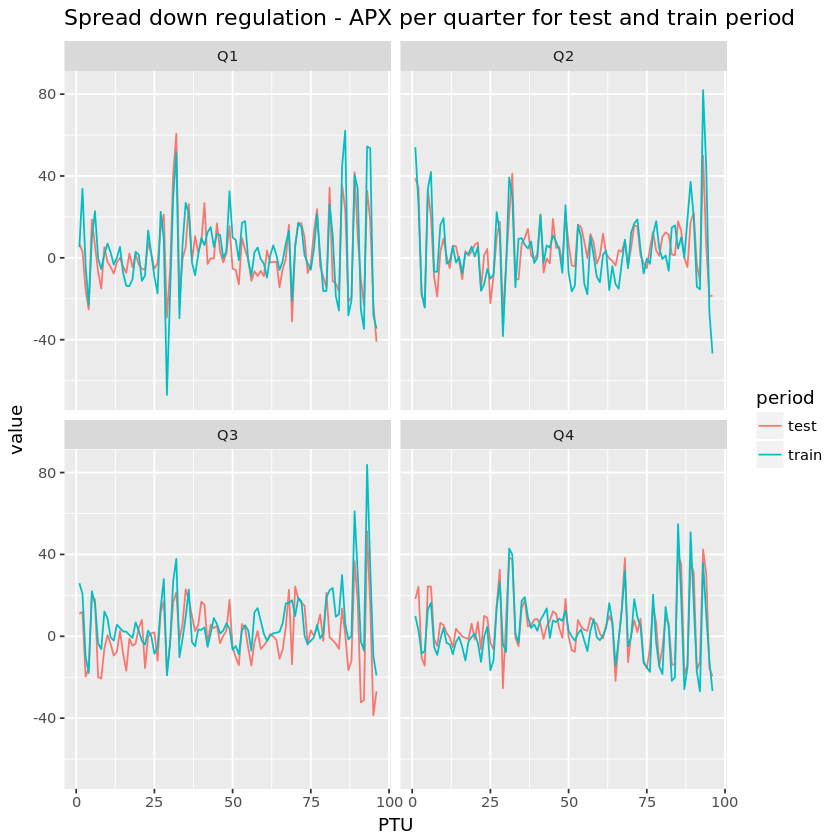

In [21]:
grp <- prc[, c('PTU', 'quarter', 'spread_down', 'period')] %>%
    group_by(PTU, quarter, period) %>%
    summarize_each(funs(mean(.))) %>%
    gather(type, value, which(colnames(.) %in% cols))

ggplot(grp) +
    geom_line(aes(PTU, value, color = period)) +
    facet_wrap(~quarter) +
    ggtitle('Spread down regulation - APX per quarter for test and train period')

In [22]:
nr_ptu <-  19 # nr of best ptu's selected

ptu_down <- prc %>%
    filter(period == 'train') %>%
    group_by(PTU) %>%
    summarize(mean_down = mean(spread_down))
ptu_down <- ptu_down %>% arrange(mean_down)

best_ptu_train <- ptu_down$PTU[1:nr_ptu]
ptu_down[1:nr_ptu, ]

PTU,mean_down
29,-31.787233
96,-31.735247
92,-20.970137
95,-18.871703
4,-18.066877
91,-14.766849
87,-13.812411
33,-13.138164
25,-11.143890
26,-10.566795


In [23]:
write.csv(ptu_down, 'mean_down_reg_spread_per_ptu.csv')

In [24]:
prc %>%
    filter(PTU %in% best_ptu_train) %>%
    group_by(period)%>%
    summarize(mean_spread_down = mean(spread_down))

prc %>%
    filter(PTU %in% best_ptu_train) %>%
    group_by(period)%>%
    summarize(mean_apx = mean(APXSPOT))

period,mean_spread_down
test,-13.2152
train,-13.5693


period,mean_apx
test,33.96133
train,40.69896


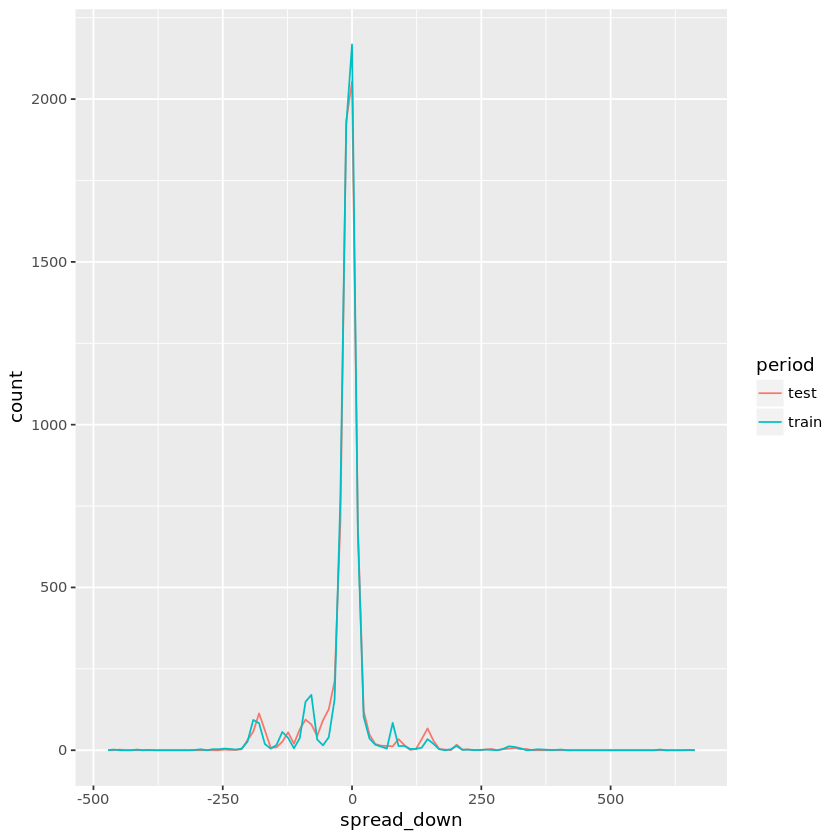

In [25]:
prc_test <- prc %>%
    filter(PTU %in% best_ptu_train)

ggplot(prc_test) + 
    geom_freqpoly(aes(spread_down, color = period), bins = 100)

Calculate the income for 1 boilers using 0.25 kWh in 1 PTU for the 19 FORECASTED most profitable PTU's.

In [26]:
sub_down <- prc %>%
    filter(period == 'test') %>%
    filter(PTU %in% best_ptu_train)

sum(sub_down$spread_down * -0.25 / 1000) %>% round(2) # calc income for 1 boiler

[1] 22.97

- Een boiler staat gemiddeld 4.8 uur per dag aan, oftewel 19 PTU's. 
- Om de ondergens te bepalen van wat er met passieve onbalans verdient kan worden, heb ik gekekegen naar wat de meest lucratieve PTU waren in het trainings jaar (2014-06-01 tot 2015-06-01), om die 19 meest lucartieve PTU te gebruiken als voorspeller voor de test periode (2015-06-01 tot 2016-06-01). Een lucratieve PTU wordt bepaald door naar de spread tussen de Afneem prijs van TenneT en de APX prijs te kijken.
- De gemiddelde spread voor die test periode voor de 19 gunstigste PTU = -13.22 EUR/MWh, ter vergelijking voor diezelfde PTU's de gemiddelde APX was 33.96 EUR/MWh. 
- De geschatte ondergrens voor passief onbalans in deze periode bedraagd een winst van 22.97 EUR per boiler per jaar. Dit is de profit als er geen volume wordt ingeboden op de APX.

# R2

- pak igcc data, minuut data is nodig
- inbiedstrategie is spread is 0, dus APX, bent price-taker
- als meest positieve PTU bekijkt, kans groot dat alle minuten van kwartier werden geregeld
- vergeet niet capacity fee van gecontracteerd = +/- 18000 EUR/MW/Quarter
-  wil liever 15 min met iets lagere spread, dan hoge spread maar paar minuten regelen

$$call \,rate = \frac{delivered \, volume}{maxmimum \, deliverable \, volume} \, per \, PTU$$
Depends on:
- Ramp rate in PTU
- Time on in PTU
- Your bidding strategy, whether you are called or not depends on how competetive you offered in the bid price ladder and the current the imbalance volume and required ramp

Bovengrens: 
- Vol vermogen gebruikt a 2750 W, boiler heeft dan 4.8* 1000/2750 = 1.75 branduren per dag.
- Branduren opgevuld met meest gunstige PTU

Ondergrens:
- Vermogen van 1000 W, dus 4.8 uur
- Inzet bepaald obv simpele voorspelling (beste PTU kiezen in jaar 1, gebruiken in jaar 2)

Aannames:
- markt oneindig diep qua volume, wij bieden weinig volume aan, dus is vrij realistisch
- price-taker
- bieden in op APX prijs, dus worden als eerste afgeroepn


`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


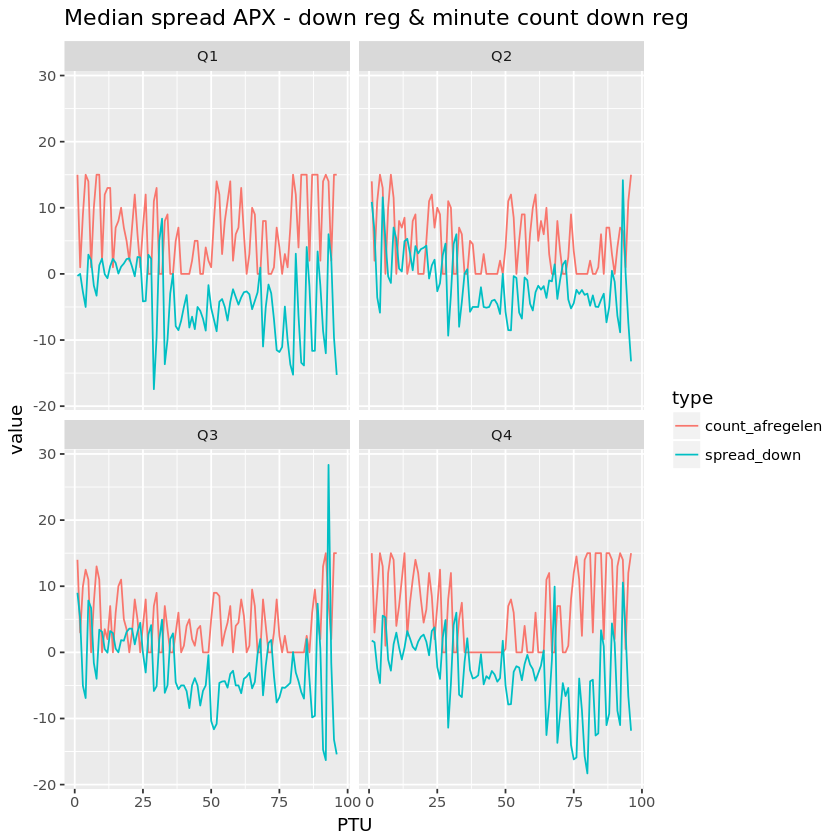

In [27]:
cols <- c('spread_down', 'count_afregelen')

grp <- prc[, c('PTU', 'quarter', cols)] %>%
    group_by(PTU, quarter) %>%
    summarize_each(funs(median(.))) %>%
    gather(type, value, which(colnames(.) %in% cols))

ggplot(grp) +
    geom_line(aes(PTU, value, color = type)) +
    facet_wrap(~quarter) +
    ggtitle('Median spread APX - down reg & minute count down reg')


`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


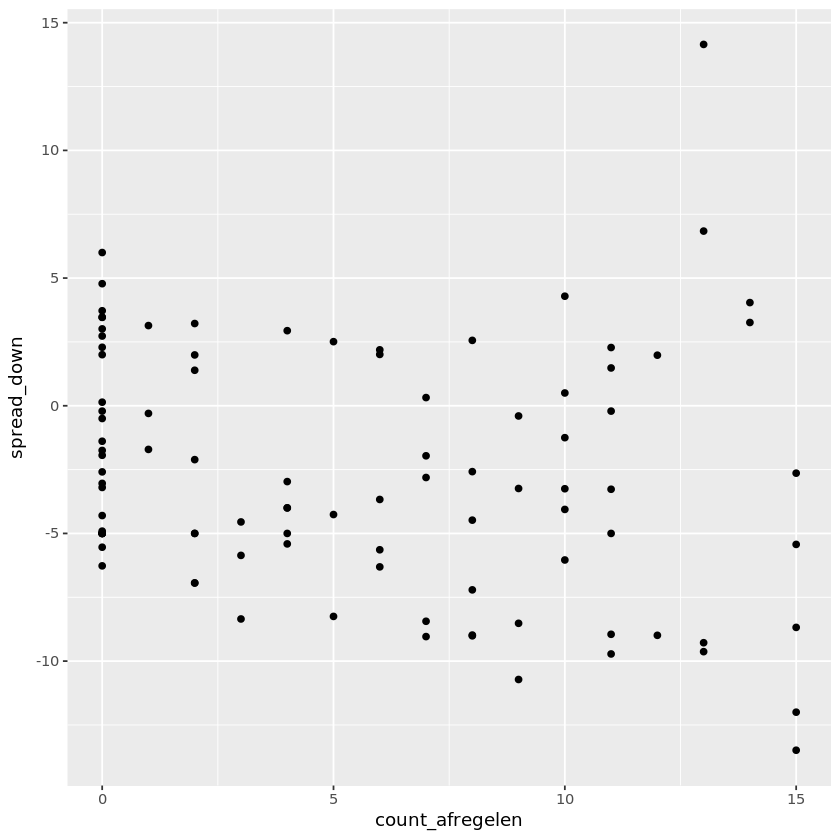

In [28]:
grp <- prc[, c('PTU', cols)] %>%
    group_by(PTU) %>%
    summarize_each(funs(median(.))) %>%
    arrange(count_afregelen)

ggplot(grp) + 
    geom_point(aes(count_afregelen, spread_down))

`summarise_each()` is deprecated.
Use `summarise_all()`, `summarise_at()` or `summarise_if()` instead.
To map `funs` over all variables, use `summarise_all()`


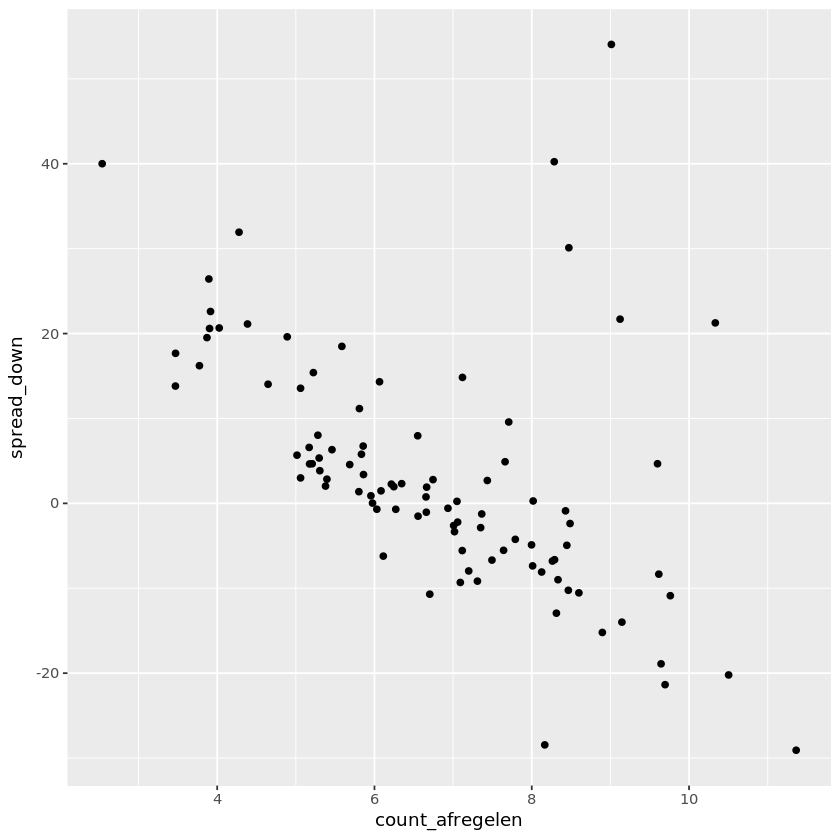

In [29]:
grp <- prc[, c('PTU', cols)] %>%
    group_by(PTU) %>%
    summarize_each(funs(mean(.))) %>%
    arrange(count_afregelen)

ggplot(grp) + 
    geom_point(aes(count_afregelen, spread_down))

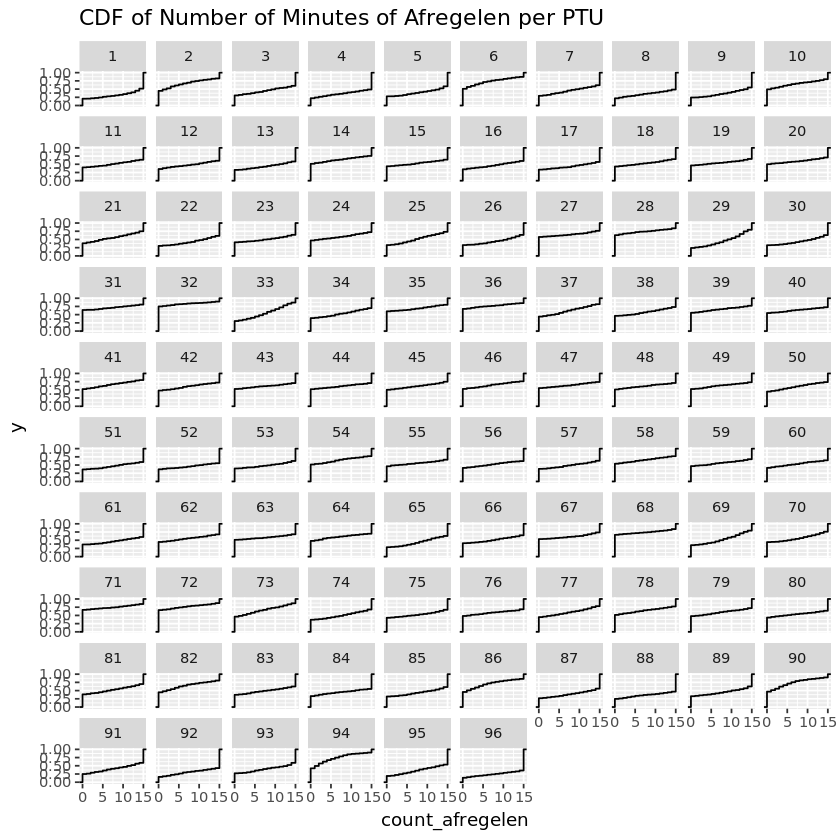

In [30]:
ggplot(prc ) +
    stat_ecdf(aes(count_afregelen)) + 
    facet_wrap(~PTU) + 
    ggtitle('CDF of Number of Minutes of Afregelen per PTU')

In [31]:
colnames(prc)

[1] "datetime"        "APXSPOT"         "Afnemen"         "invoeden"       
 [5] "opregelen"       "Afregelen"       "count_afregelen" "PTU"            
 [9] "hour"            "day"             "month"           "weekday"        
[13] "quarter"         "spread_up"       "spread_down"     "spread_up_reg"  
[17] "spread_down_reg" "rank_down"       "period"

## Bovengrens

In [32]:
prc$afregel_income <- NA
minutes_on_per_day <- 1.75 * 60

days <- unique(prc$day)

# calc income per day
for (i_day in days){
       
    income_per_date <- prc %>% 
        filter(day == i_day) %>% # slice 1 day
        arrange(spread_down_reg) %>% # sort by spread down
        mutate(cum_count_afregelen = cumsum(count_afregelen)) %>% # add column with cumsum minutes afregelen
        filter(cum_count_afregelen <= minutes_on_per_day) %>% # slice rows until required minutes afregelen is met
        mutate(income = spread_down_reg * count_afregelen / 60) %>% # calc income per PTU
        summarize(cum_income = sum(income, na.rm = T)) # calc income per day

    prc[prc$day == i_day, 'afregel_income'] = income_per_date$cum_income
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


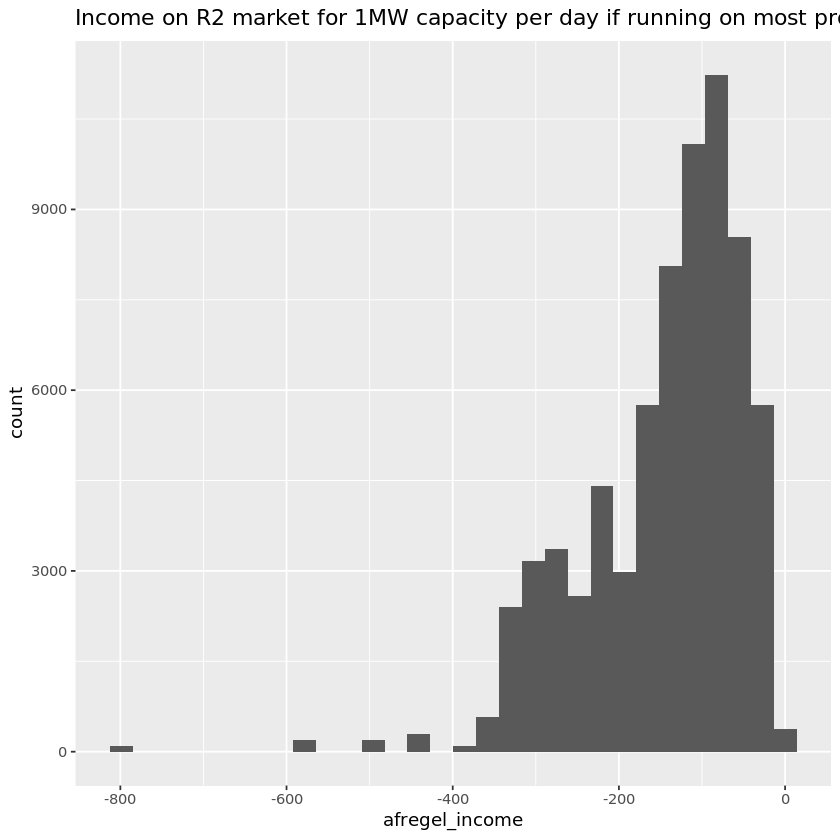

In [33]:
ggplot(prc) +
    geom_histogram(aes(afregel_income)) + 
    ggtitle('Income on R2 market for 1MW capacity per day if running on most profitable 1.75 hours')

Let's check how many minutes of afregelen there are per day. Is it sufficient to heat boilers only on R2.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     65     483     653     648     817    1256 

[1] "number of day with less than 1.75 hour afregelen:  5 , out of total number of days:  731 , equals to %:  0.68"

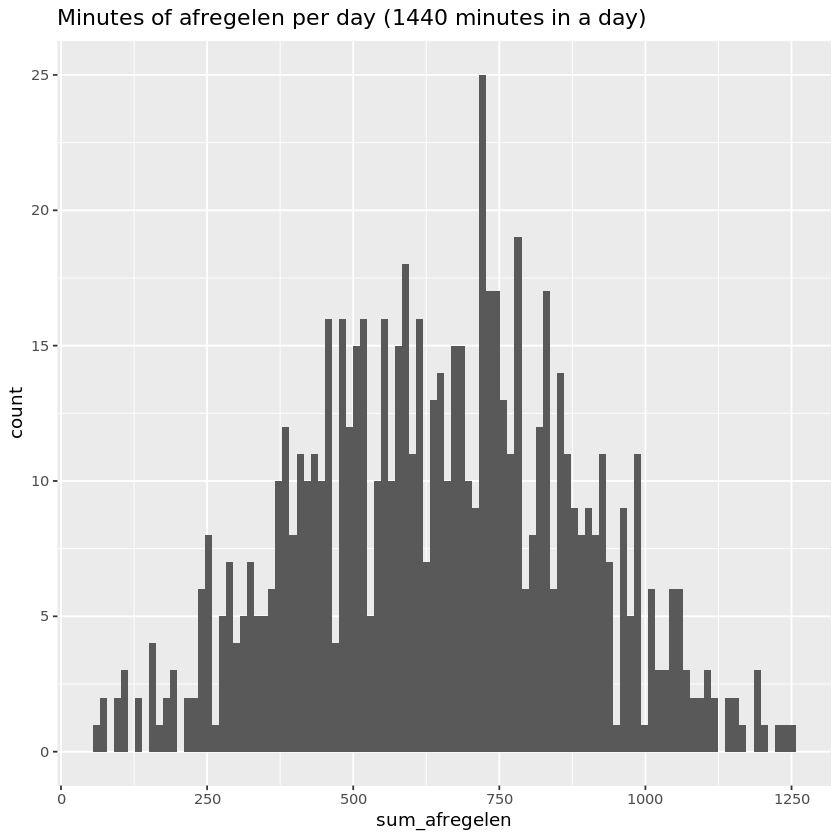

In [34]:
count_afregelen <- prc %>%
    group_by(day) %>%
    summarize(sum_afregelen = sum(count_afregelen, na.rm = T))

summary(count_afregelen$sum_afregelen)

ggplot(count_afregelen) + 
    geom_histogram(aes(sum_afregelen), bins = 100) + 
    ggtitle('Minutes of afregelen per day (1440 minutes in a day)')

N <- length(count_afregelen$sum_afregelen)
paste('number of day with less than 1.75 hour afregelen: ',
      length(which(count_afregelen$sum_afregelen < (1.75 * 60))) %>% round(2),
      ', out of total number of days: ', N,
     ', equals to %: ', (100 * length(which(count_afregelen$sum_afregelen < (1.75 * 60))) / N) %>% round(2))

In [35]:
prc %>%
    group_by(day, period) %>%
    summarize(afregel_income = mean(afregel_income)) %>%
    mutate(boiler_income = afregel_income * 2.75 * 1.75 / 1000) %>%
    group_by(period) %>%
    summarize(sum(boiler_income) %>% round(2)) 

period,sum(boiler_income) %>% round(2)
test,-258.90
train,-255.04


## R2 - Ondergrens

In [36]:
prc$afregel_income <- NA
prc$afneem_income <- NA

days <- unique(prc$day)

for (i_day in days){
       
    income_per_date <- prc %>% 
        filter(day == i_day) %>%
        arrange(spread_down_reg) %>%
        mutate(cum_count_afregelen = cumsum(count_afregelen)) %>%
        filter(cum_count_afregelen <= minutes_on_per_day) %>%
        mutate(income = spread_down_reg * count_afregelen / 60) %>%
        summarize(cum_income = sum(income, na.rm = T)) 

    prc[prc$day == i_day, 'afregel_income'] = income_per_date$cum_income
}

Methode:
- Calc income when using boilers on R2 market
- Boilers require 1.75 burning hours per day. Try to make only on R2 
- If not called enough then sold against mean Afneem spread for that day
- PTU on which power is sold on R2 are picked randomly (slice(sample(nrow()))
- Power is offered at APX price on the R2 market, so no negative prices possible (income at call rate 1 from 43 -> 46)

In [37]:
data.frame()

<0 x 0 matrix>

In [ ]:
set.seed(1)

r2_results <- data.frame()

boiler_capacity <- 2.750 / 1000 # MW
call_rate <- 1 # indien R2 afroepen wat is de kans dat boilers wordt afgeroepen per PTU
required_burning_mins <- 1.75 * 60 * call_rate
call_rates <- seq(from = 0, to = 1, by = 0.1)

days <- unique(prc$day)

for (call_rate in call_rates) {
    
    prc$afregel_income <- NA
    prc$afneem_income <- NA
    prc$total_income <- NA

    # calc income per day
    for (i_day in days){
        print(i_day)

        # select day
        prc_day <- prc %>% 
            filter(day == i_day) %>% 
            mutate(count_afregelen = count_afregelen * call_rate) # compensate for call_rate

        # calc R2 income
        income_per_date <- prc_day %>% 
            filter(spread_down_reg < 0) %>% # capacity offered at APX, so no POS spreads
            slice(sample(nrow(.))) %>% # randomize the daily data rowwise
            mutate(cum_count_afregelen = cumsum(count_afregelen)) %>% # cumsum of minutes afregelen
            filter((cum_count_afregelen) <= required_burning_mins) %>%
            mutate(income = spread_down_reg * boiler_capacity * count_afregelen / 60) %>%
            summarize(cum_income = sum(income, na.rm = T))

        prc[prc$day == i_day, 'afregel_income'] = income_per_date$cum_income
        prc[prc$day == i_day, 'total_income'] = income_per_date$cum_income

        # als niet genoeg kan draaien op R2 dan gemiddeld passieve onbalans voor die dag
        if (sum(prc_day$count_afregelen, na.rm = T) < required_burning_mins) {
            print('AFNEMEN')
            remaining_burning_hours <- (required_burning_mins - sum(prc_day$count_afregelen, na.rm = T)) / 60
            income_afnemen <- mean(prc_day$spread_down, na.rm = T) * remaining_burning_hours * boiler_capacity

            prc[prc$day == i_day, 'afneem_income'] = income_afnemen

            # total income is Afneem + afregel income
            prc[prc$day == i_day, 'total_income'] = income_afnemen + income_per_date$cum_income
        } # if

    } # for days
    
    r2_results <- bind_rows(r2_results, 
                           prc %>% 
                               select(c(datetime, day, weekday, period,
                                        afneem_income, afregel_income, total_income)) %>%
                                mutate(callrate = call_rate)
                           )
    
}

In [ ]:
colnames(prc)

In [ ]:
r2_results_callrate <- r2_results %>%
    group_by(day, period, callrate) %>%
    summarize(total_income = mean(total_income),
              afneem_income = mean(afneem_income),
              afregel_income = mean(afregel_income)) %>%
    group_by(period, callrate) %>%
    select(c(total_income, afneem_income, afregel_income)) %>%
    summarize_each(funs(sum(., na.rm=T)))

print(r2_results_callrate)

ggplot(data = r2_results_callrate %>% 
           filter(period == 'test' ) %>%
          gather(type, value, 3:5)) + 
    geom_line(aes(callrate, -value, color = type)) + 
    ggtitle('Lower limit income on R2 per call rate') + 
    labs(y = 'EUR/boiler/year')


TODO
- grafiek call rate vs income
- make function om income te bepalen met als parameters(df, call_rate)


Aannames ondergrens
- productie op 2750 W
- als niet genoeg minuten dan gemiddelde afneemprijs
- keuze welke PTU als eerste afregel vermogen is random
- benodigde branduren 1.75 uur
- 

# Select PTUs for First Run

In [ ]:
#nr_ptu <-  19 # nr of best ptu's selected

ptu_down <- prc %>%
    filter(datetime > '2015-06-01 00:00:00') %>%
    group_by(PTU) %>%
    summarize(mean_down = mean(spread_down), 
             median_down = median(spread_down))

ptu_down %>% arrange(mean_down) %>% slice(1:10)

f_ptu_down = '../../data/spread_down_per_ptu.csv'

write.csv(ptu_down, f_ptu_down)